# Práctica 2: Aprendizaje automático

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de __2 notebooks__ que se entregarán en las tareas de entrega habilitadas en el Campus Virtual. Este notebook corresponde al apartado de __clasificación__.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: K__

__Nombres de los estudiantes: Sergio Martínez Olivera y Daniel Roldán Serrano__

# Apartado 2: Regresión

En este notebook trabajaremos con un conjunto de datos tomado del repositorio de la Universidad de California Irvine. En concreto, se trata de un conjunto de datos sobre distintos vinos del norte de Portugal (vinho verde)  que puedes encontrar [aquí](https://archive.ics.uci.edu/ml/datasets/wine+quality).

El objetivo es modelar la calidad del vino (con un valor de 0 a 10) en base a variables que reflejan sus propiedades físicas y químicas. En concreto, las propiedades son las siguientes:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

De cara a la memoria que vas a realizar puedes investigar sobre estas propiedades para explicar mejor qué miden y cómo afectan al vino.

La calidad del vino es una variable que toma valores entre 0 y 10.

Para modelar la relación entre la calidad del vino y sus propiedades usaremos una red neuronal.

## 1) Descripción de los datos

Carga el fichero de datos `calidad_vinos.csv` en un dataframe.

Describe el conjunto de datos e identifica aquella variable que tiene unos valores extremos más acusados con respecto a la media, y aquella que está más concentrada en torno a la media. Reflexiona sobre la posible influencia de estas variables a la hora de entrenar el perceptrón multicapa.

Estudia la distribución de la calidad del vino en el conjunto de datos.

In [1]:
import sklearn

In [2]:
#Realizamos todos los posibles imports necesarios 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


#Cargamos el documento y lo guardamos en un DataFrame que llamamos vinos
vinos = pd.read_csv('calidad_vinos.csv')

vinos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
vinos.describe().transpose()
#En primer lugar, destacamos las variables que tienen unos valores extremos más acusados con respecto a la media (dispersos).
#Estas son, claramente, el dióxido de sulfuro libre (free sulfur dioxide) y el dióxido de sulfuro total (total sulfur dioxide). Ambas tienen una
#desviación típica muy elevada repecto al valor de la media. El libre tiene una media de 15.87 y una std de 10.46, y, el total tiene una media de
#46.47 y una std de 32.90. Además, los rangos de mínimo y máximo, en especial este último, de estas dos variables reafirman lo expuesto, ya que, 
#en ambos casos, tanto el mínimo como el máximo están muy distanciados de la media.
# min_free = 1, max_free = 72, media_free = 15.87
# min_total = 6, max_total = 289, media_total = 46.47

#Por el contrario, la variable que está más concentrada en torno a la media es la densidad. Esta cuenta con una media de 0.996747 y una desviación
#típica de 0.001887, mientras que su mínimo es 0.99007 y su máximo, 1.00369. Con diferencia, observando los valores de las std del resto de variables,
#concluimos que es la más concentrada en torno a la media, ya que la siguiente std más baja es la del pH, 0.154386.

#Por un lado, las variables dispersas influyen reduciendo la eficacia/convergencia del perceptrón, ya que lo hacen más inestable y propenso a errores,
#aportando demasiada variabilidad. 
#Por otro lado, las variables más concentradas generan lo que se conoce como underfitting, ya que no aportan ninguna variabilidad e impiden al 
#perceptrón aprender de esa variable.
#De aquí que sea esencial hacer una normalización de las variables, para que de esta forma el perceptrón tenga la variabilidad necesaria 
#y así aprenda y converja.

#Por último, en cuanto a la calidad del vino, observamos que los datos están concentrados en torno a la media, que es 5.64, ya que la calidad del vino 
#tiene una desviación típica de 0.81. Por otro lado, si miramos los valores de mínimo y máximo (teniendo en cuenta que la calidad del vino oscila en el
#rango 0-10) nos damos cuenta de que no hay ningún vino muy bueno (con una calidad por encima de 8) ni muy malo (con una calidad menor que 3).

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


## 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga el precio y, selecciona las variables que estén más correlacionadas con él (estableciendo para ello un valor umbral que consideres adecuado).

In [4]:
correlacion = vinos.corr()['quality'] #Determinamos la correlación respecto a quality
correlacion
#Hay 2 correlaciones muy destacadas: volatile acidity y alcohol, la primera negativa, -0.39, y la segunda positiva, 0.48.
#En cuanto a la acidez volátil, al ser negativa su correlación respecto a la calidad, a mayor acidez menor calidad tendrá ese vino. 
#Mientras que con el alcohol se tiene el efecto contrario al ser su correlación positiva, a más alcohol, mayor calidad de vino.
#También se pueden destacar los sulfatos (corr. 0.25) y el ácido cítrico (corr. 0.23).

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [5]:
#Observando los coeficientes de correlación, hemos decidido que un umbral adecuado puede ser 0.15 (tanto para las correlaciones positivas)
#como para las negativas), ya que nos aportan variables que verdaderamente muestran cierta relación con la cualidad, al contrario que, 
#por ejemplo, las variables con coeficientes muy cercanos al 0, como pueden ser el azúcar residual (0.014) o el dióxido de sulfuro libre 
#(-0.05). Además, parece un umbral adecuado dado que el coeficiente de correlación máximo alcanzado es 0.476, es decir, tomamos aproximadamente
#un tercio del coeficiente máximo alcanzado.
variables_destacadas = correlacion[abs(correlacion) > 0.15] #Filtramos las variables con un valor absoluto de correlación mayor que 0.15
vinos_corr = vinos[variables_destacadas.index] #Creamos el nuevo dataframe
vinos_corr

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.700,0.00,34.0,0.99780,0.56,9.4,5
1,0.880,0.00,67.0,0.99680,0.68,9.8,5
2,0.760,0.04,54.0,0.99700,0.65,9.8,5
3,0.280,0.56,60.0,0.99800,0.58,9.8,6
4,0.700,0.00,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...
1594,0.600,0.08,44.0,0.99490,0.58,10.5,5
1595,0.550,0.10,51.0,0.99512,0.76,11.2,6
1596,0.510,0.13,40.0,0.99574,0.75,11.0,6
1597,0.645,0.12,44.0,0.99547,0.71,10.2,5


## 3) Normalización

Decide si debes o no normalizar los datos de entrada y/o de salida. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.


In [6]:

#Como ya hemos comentado anteriormente, consideramos necesario normalizar los datos de entrada, ya que presentan rangos muy distintos, 
#y algunos de ellos están o muy dispersos o muy concentrados respecto a la media. En cuanto a estandarizar o escalar, vamos a optar por
#estandarizar, ya que es la opción más adecuada para variables con rangos muy diversos y variables dispersas. 
#Con la estandarización hacemos que cada variable contribuya de igual modo al modelo, debido a que todas se encontrarán en rangos similares, 
#con media 0 y std 1. No optamos por el escalado porque de ese modo distorsionaríamos la distribución original de los datos.

scaler = StandardScaler()

variables_estandarizar = vinos_corr.drop('quality', axis=1)  # Determinamos las variables a estandarizar (todas menos quality)
vinos_estandarizados = scaler.fit_transform(variables_estandarizar) # Estandarizamos las variables que hemos guardado

#Creamos un nuveo dataframe con los datos estandarizados
vinos_estandarizados = pd.DataFrame(vinos_estandarizados, columns=variables_estandarizar.columns) 
vinos_estandarizados['quality'] = vinos_corr['quality']
vinos_estandarizados

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.961877,-1.391472,-0.379133,0.558274,-0.579207,-0.960246,5
1,1.967442,-1.391472,0.624363,0.028261,0.128950,-0.584777,5
2,1.297065,-1.186070,0.229047,0.134264,-0.048089,-0.584777,5
3,-1.384443,1.484154,0.411500,0.664277,-0.461180,-0.584777,6
4,0.961877,-1.391472,-0.379133,0.558274,-0.579207,-0.960246,5
...,...,...,...,...,...,...,...
1594,0.403229,-0.980669,-0.075043,-0.978765,-0.461180,0.072294,5
1595,0.123905,-0.877968,0.137820,-0.862162,0.601055,0.729364,6
1596,-0.099554,-0.723916,-0.196679,-0.533554,0.542042,0.541630,6
1597,0.654620,-0.775267,-0.075043,-0.676657,0.305990,-0.209308,5


## 4) Primer modelo: kNN

Antes de pasar a crear las redes neuronales, vamos crear unos primeros modelos más sencillos para comparar. Para ello:

- Crea varios modelos kNN con distintos valores de k (de 2 a 20 vecinos)
- Calcula el MSE de cada uno de ellos, utilizando validación cruzada, para elegir el mejor valor de k

Para elegirlo, pinta el gráfico de MSE para los distintos valores de k.

In [7]:
#En primer lugar, calcularemos el porcentaje de vinos de cada nota en el dataframe de partida, para ver la proporción
#que mantendremos en el conjunto de entrenamiento si utilizmos el parámetro stratify.
vinos_estandarizados['quality'].value_counts() / vinos_estandarizados['quality'].count() * 100


quality
5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: count, dtype: float64

Text(0.5, 1.0, 'Valor del MSE para diferentes k')

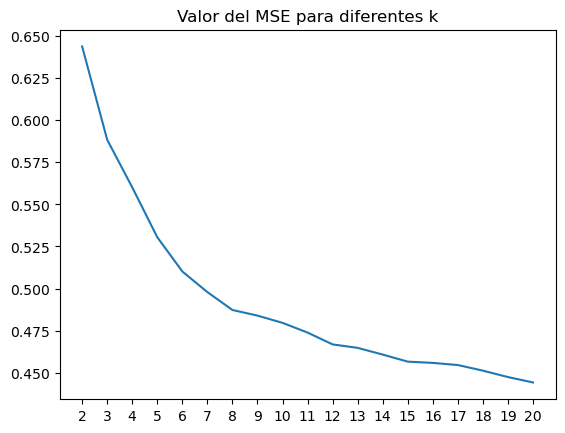

In [8]:

MSE = np.zeros(19)
for k in range (2,21):
    # Creamos el clasificador k-NN
    clf = KNeighborsRegressor(n_neighbors=k, weights='distance')

    # Validación cruzada dividiendo el conjunto de datos en 10 partes (cv = 10). Quitamos la variable de calidad para el entrenamiento y
    # ponemos como métrica en scoring el MSE
    scores = cross_validate(clf, vinos_estandarizados.drop(columns=['quality']), 
                        vinos_estandarizados['quality'], 
                        scoring='neg_mean_squared_error', cv= 10, return_train_score=False)

    # Extraemos el MSE de cada uno de los 10 entrenamientos
    valores_MSE = -scores['test_score']
    
    # Guardamos el valor del MSE
    MSE[k - 2] = valores_MSE.mean()


plt.plot(range(2, 21), MSE)
plt.xticks(range(2, 21, 1)) #Forzamos a que en el eje X los valores aparezcan de 1 en 1
plt.title('Valor del MSE para diferentes k')

#En la gráfica se observa con claridad que la gráfica es decreciente, es decir,
#a mayor número de vecinos, menor es el MSE, más preciso es el algoritmo. El valor de k óptimo, consecuentemente, lo tenemos en k = 20, con
#un valor aproximado de 0.450.
#Sin embargo, podemos observar que, aproximadamente, a partir de k = 9 la diferencia en el MSE es insignificante, de menos de 0.025,luego,
#los valores de k >= 9 también son adecuados.



## 5) Redes neuronales: Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 250 neuronas
- La segunda con varias capas ocultas entre las que debes distribuir 250 neuronas, como te parezca

Asegúrate de que no salen warnings durante el entrenamiento indicando que no se ha alcanzado la convergencia durante el entrenamiento (para arreglarlo basta con poner un número de max_iter suficientemente grande).

En la configuración del perceptrón debes usar validación cruzada y explorar varios valores para el parámetro `alpha` que controla el coeficiente de regularización L2.

Para elegir el valor adecuado de dicho coeficiente pinta la curva de aprendizaje para cada perceptrón. En la curva debes pintar una línea que represente el error medio de las distintas particiones de validación y un área sombreada que represente la desviación típica.

Una vez tengas la curva de aprendizaje:
  - Identifica las diferencias de comportamiento entre ambos perceptrones, razona o especula sobre por qué se dan. ¿Hay alguno que domine al otro? ¿Es el comportamiento de uno más volátil que el del otro?
  - Determina de manera razonada con qué perceptrón te quedas y el valor óptimo del parámetro de regularización.

In [12]:
# Perceptrón con una sola capa oculpa de 250 neuronas
alpha_values = np.arange(0.1, 2.1, step=0.2) # [0.1, 0.3, 0.5,  ..., 2.1]
MSE_mean = []
MSE_std = []
for value in alpha_values:
       
    mlp = MLPRegressor(hidden_layer_sizes= (250,), activation='relu', solver='adam', alpha=value, batch_size=100,
          learning_rate_init=0.001, max_iter=500, random_state=333)

    #Para llevar a cabo la validación cruzada, en el conjunto de entrenamiento quitamos la columna de quality, ya que
    #se trata de la variable objetivo que intentamos predecir.
    scores = cross_validate(mlp, vinos_estandarizados.drop(columns=['quality']), 
                            vinos_estandarizados['quality'], 
                            scoring='neg_mean_squared_error', cv= 10, return_train_score=False)
    
    MSE_mean.append(np.mean(-scores['test_score']))
    MSE_std.append(np.std(-scores['test_score']))





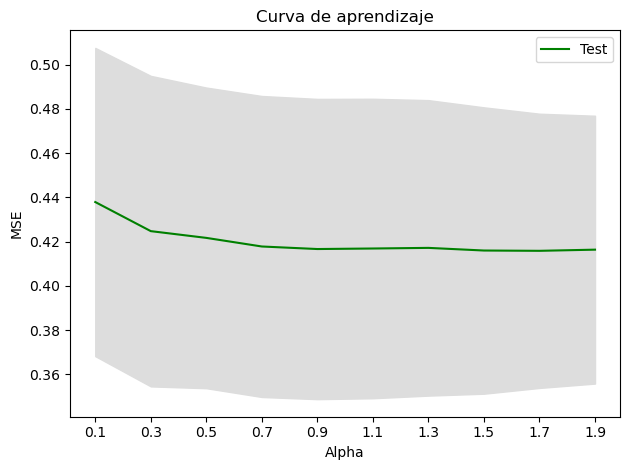

In [13]:

plt.plot(alpha_values, MSE_mean, color="g", label="Test")
    
# Dibujamos la banda de la desviación típica
lower_limit = np.array(MSE_mean) - np.array(MSE_std)
upper_limit = np.array(MSE_mean) + np.array(MSE_std)
plt.fill_between(alpha_values, lower_limit, upper_limit, color="#DDDDDD")
    
# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Alpha"), plt.ylabel("MSE"), plt.legend(loc="best")
plt.xticks(np.arange(0.1, 2.1, 0.2)) #Forzamos a que en el eje X los valores aparezcan de 1 en 1
plt.tight_layout()
plt.show()

In [14]:
# Perceptrón con 5 capas ocultas de 50 neuronas cada 
alpha_values = np.arange(0.1, 2.1, step=0.2) # [0.1, 0.3, 0.5,  ..., 2.1]
MSE_mean = []
MSE_std = []
for value in alpha_values:
        
    mlp = MLPRegressor(hidden_layer_sizes= (50,50,50,50,50), activation='relu', solver='adam', alpha=value, batch_size=100,
          learning_rate_init=0.001, max_iter=500, random_state=333)

    #Para llevar a cabo la validación cruzada, en el conjunto de entrenamiento quitamos la columna de quality, ya que
    #se trata de la variable objetivo que intentamos predecir.
    scores = cross_validate(mlp, vinos_estandarizados.drop(columns=['quality']), 
                            vinos_estandarizados['quality'], 
                            scoring='neg_mean_squared_error', cv= 10, return_train_score=False)
    
    MSE_mean.append(np.mean(-scores['test_score']))
    MSE_std.append(np.std(-scores['test_score']))



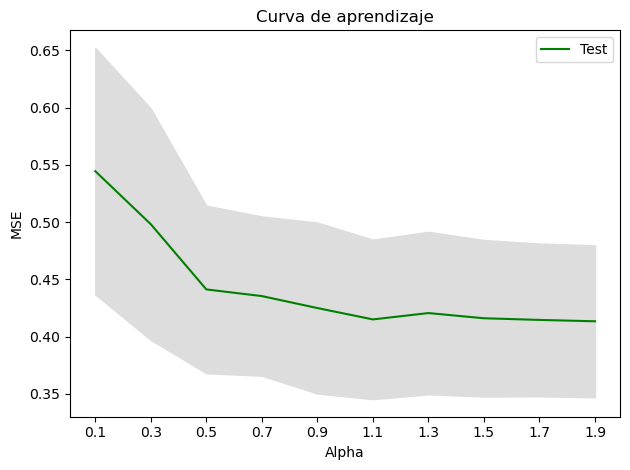

In [15]:


plt.plot(alpha_values, MSE_mean, color="g", label="Test")
    
# Dibujamos la banda de la desviación típica
lower_limit = np.array(MSE_mean) - np.array(MSE_std)
upper_limit = np.array(MSE_mean) + np.array(MSE_std)
plt.fill_between(alpha_values, lower_limit, upper_limit, color="#DDDDDD")
    
# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Alpha"), plt.ylabel("MSE"), plt.legend(loc="best")
plt.xticks(np.arange(0.1, 2.1, 0.2)) #Forzamos a que en el eje X los valores aparezcan de 1 en 1
plt.tight_layout()
plt.show()

In [16]:
# Perceptrón con 2 capas ocultas de 125 neuronas cada 
alpha_values = np.arange(0.1, 2.1, step=0.2) # [0.1, 0.3, 0.5,  ..., 2.1]

MSE_mean = []
MSE_std = []

for value in alpha_values:
    
    mlp = MLPClassifier(hidden_layer_sizes= (125,125), activation='relu', solver='adam', alpha=value, batch_size=100,
          learning_rate_init=0.001, max_iter=500, random_state=333)
    
    #Para llevar a cabo la validación cruzada, en el conjunto de entrenamiento quitamos la columna de quality, ya que
    #se trata de la variable objetivo que intentamos predecir.
    scores = cross_validate(mlp, vinos_estandarizados.drop(columns=['quality']), 
                            vinos_estandarizados['quality'], 
                            scoring='neg_mean_squared_error', cv= 10, return_train_score=False)
    
    MSE_mean.append(np.mean(-scores['test_score']))
    MSE_std.append(np.std(-scores['test_score']))



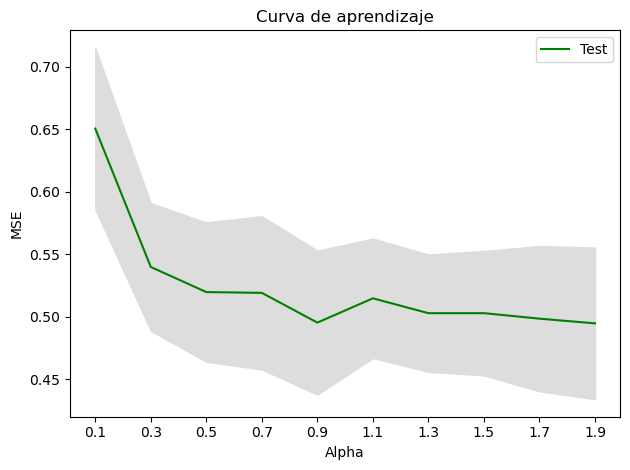

In [17]:

 
plt.plot(alpha_values, MSE_mean, color="g", label="Test")
    
# Dibujamos la banda de la desviación típica
lower_limit = np.array(MSE_mean) - np.array(MSE_std)
upper_limit = np.array(MSE_mean) + np.array(MSE_std)
plt.fill_between(alpha_values, lower_limit, upper_limit, color="#DDDDDD")
    
# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Alpha"), plt.ylabel("MSE"), plt.legend(loc="best")
plt.xticks(np.arange(0.1, 2.1, 0.2)) #Forzamos a que en el eje X los valores aparezcan de 1 en 1
plt.tight_layout()
plt.show()

In [19]:
# Perceptrón con 3 capas ocultas de 50,80 y 120 neuronas cada 
alpha_values = np.arange(0.1, 2.1, step=0.2) # [0.1, 0.3, 0.5,  ..., 2.1]

MSE_mean = []
MSE_std = []

for value in alpha_values:

    mlp = MLPClassifier(hidden_layer_sizes= (50, 80, 120), activation='relu', solver='adam', alpha=value, batch_size=100,
          learning_rate_init=0.001, max_iter=500, random_state=333)

    #Para llevar a cabo la validación cruzada, en el conjunto de entrenamiento quitamos la columna de quality, ya que
    #se trata de la variable objetivo que intentamos predecir.
    scores = cross_validate(mlp, vinos_estandarizados.drop(columns=['quality']), 
                            vinos_estandarizados['quality'], 
                            scoring='neg_mean_squared_error', cv= 10, return_train_score=False)
    
    MSE_mean.append(np.mean(-scores['test_score']))
    MSE_std.append(np.std(-scores['test_score']))


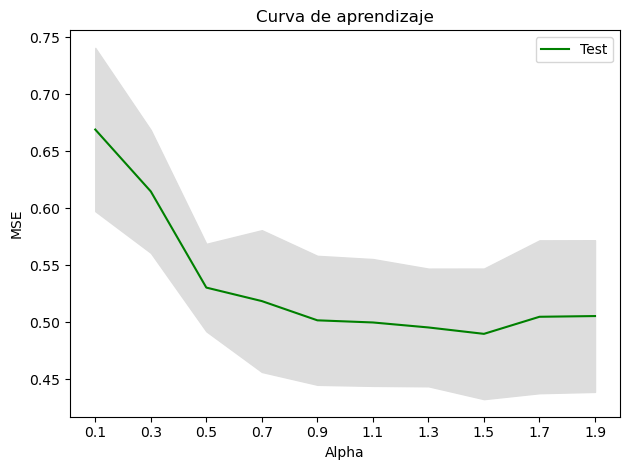

In [20]:


plt.plot(alpha_values, MSE_mean, color="g", label="Test")
    
# Dibujamos la banda de la desviación típica
lower_limit = np.array(MSE_mean) - np.array(MSE_std)
upper_limit = np.array(MSE_mean) + np.array(MSE_std)
plt.fill_between(alpha_values, lower_limit, upper_limit, color="#DDDDDD")
    
# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Alpha"), plt.ylabel("MSE"), plt.legend(loc="best")
plt.xticks(np.arange(0.1, 2.1, 0.2)) #Forzamos a que en el eje X los valores aparezcan de 1 en 1
plt.tight_layout()
plt.show()

In [ ]:
#Hemos construido 4 perceptrones, el primero de ellos con una sola capa de 250 neuronas, el segundo con 5 capas de 50 neuronas cada una,
#el tercero con 2 capas de 125 neuronas cada una y el último con 3 capas de 50, 80 y 120 neuronas. Podemos observar que en todos ellos 
#la evolución del MSE es similar, dando lugar a una gráfica decreciente, es decir, a mayor valor de alpha menor es el error cuadrático medio.
#Eso sí, en todos ellos, a partir de cierto valor de alpha, aproximadamente 0.9, el MSE se estabiliza hasta volverse prácticamente, a
#constante, con valores entre alrededor de 0.4 para las dos primeras, y valores de 0.5 para las dos últimas.
#Otro aspecto destacable es que  en los perceptrones con más de una capa, con valores pequeños de alpha se tienen MSE's bastante
#más altos, que superan el 0.55, en el de 5 capas, e incluso 0.65, en el de 2 capas y 3 capas, aspecto que no se da en el perceptrón 
#de una sola capa. De hecho, en el de 3 capas el MSE para alpha = 0.1 es de aproximadamente 0.67, el mayor valor que alcanza. 
#En cuanto a las desviaciones típicas, observamos cierta tendencia a una mayor desviación típica al aumentar capas, como por ejemplo, en
#el perceptrón de 5 capas, donde llega a alcanzar valores de aproximadamente 0.1, frente a los valores de 0.05 o 0.07 en los que ronda
#en los otros perceptrones.
#Con todo esto, podríamos decir que el perceptrón de una sola capa es el menos volátil, ya que su MSE oscila en un rango muy pequeño
#(entre 0.44 y 0.42) sea cual sea el valor de alpha, a diferencia de los otros perceptrones, cuyo MSE se dispara con valores pequeños 
#de alpha. Ademas, cuenta con una desviación típica adecuada, de 0.05 aprox, no muy elevada. 
#En cuanto a la dominancia, no hay ninguno que resalta sobre el resto especialmente, ya que, como se ha mencionado antes, el MSE se 
#estabiliza en 0.42 en el de 1 capa y en el de 5 capas, a partir de alpha = 0.9. Por lo tanto, ninguno tiene un rendimiento muy superior 
#al resto con esta métrica, a excepción de los dos primeros que rinden de manera similar.
#¿A qué se puede deber esta ausencia de un perceptrón dominante? Por un lado, no hemos llevado a cabo un estudio exhaustivo del número de
#capas y neuronas por capa, luego, puede que estemos omitiendo perceptrones con un rendimiento superior. Además, ya que intuitivamente
#se suele asociar un mayor número de capas a una mayor complejidad del problema, puede que al tratarse nuestro problema de un problema 
#de "juguete", no haya mucha diferencia entre la configuración de distintas capas y neuronas en el perceptrón, y de este modo
#el mejor resultado se obtenga con una sola capa.

#Con lo deducido, ya que el perceptrón de una única capa es menos volátil que el resto, y tiene un rendimiento similar, nos quedaríamos
#con él. De las gráficas de este perceptrón se puede deducir que el valor óptimo de alpha es cualquiera entre 0.7 y 1.9, con valores
#de MSE alrededor de 0.42.


## 6) Medición y análisis del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción de la calidad de todos los vinos usando validación cruzada.

A continuación:
- Muestra varias medidas de error y razona sobre si el error te parece pequeño o no para el problema que estás analizando
- Muestra el histograma de la distribución del error o del error en valor absoluto, y razona de nuevo si te parece que el modelo ha predicho bien o no. Identifica los vinos para los cuales el modelo ha fallado más.
- Analiza el error cometido para los vinos según su puntuación de calidad observada (3, 4, etc). Describe lo que sucede, explica por qué crees que sucedió y razona de nuevo si te parece que el modelo funciona bien o tiene limitaciones.
- Compara los resultados obtenidos (al menos MSE) con el mejor modelo de kNN.

In [9]:
clf = MLPRegressor(hidden_layer_sizes=(250, ), activation='relu', solver='adam', alpha=1.5, batch_size=100,
             learning_rate_init=0.001, max_iter=500, random_state=333)

pred = cross_val_predict(clf, vinos_estandarizados.drop(columns=['quality']), vinos_estandarizados['quality'], cv=10)
reales = vinos_estandarizados['quality']  # Valores reales

# MSE
MSE = mean_squared_error(reales, pred)
print("MSE: " + str(MSE))

# MAE
MAE = mean_absolute_error(reales, pred)
print("MAE: " + str(MAE))

# R2
r2 = r2_score(reales, pred)
print("R2: " + str(r2))


#Por un lado, observamos que los valores de MSE y MAE, 0.42 y 0.50 aproximadamente, son unos valores que indican un buen rendimiento de 
#la red neuronal, ya que nuestra variable objetivo toma valores enteros del 0 al 10, es decir, el error es menor que medio punto, lo 
#cual nos dice que es improbable que clasifique un vino con calidad x como un vino de calidad x + 1/x - 1, lo cual ocurriría
#si el error fuera superior a un punto.
#En cuanto a la métrica de R2, nos indica el cómo de bien mide el modelo porcentaje de variabilidad de los datos. Cuanto más cercano
#sea a 1, mejor es el modelo. En nuestro caso, obtenemos un R2 de 0.36, que no es especialmente bueno, el modelo no tiene un buen 
#rendimiento con esta métrica.
#Quizás, llevando a cabo un mayor número de iteraciones, conseguiríamos mejores valores de las métricas, pero tardaríamos mucho más
#tiempo en compilar el código.



MSE: 0.4159596801613211
MAE: 0.4989605021158617
R2: 0.36179063514755216


In [29]:
clf = MLPClassifier(hidden_layer_sizes=(250, ), activation='relu', solver='adam', alpha=1.5, batch_size=100,
             learning_rate_init=0.001, max_iter=500, random_state=333)

#Para estudiar las métricas de precision y recall, debemos realizar una clasificación en vez de regresión. ¿Es esto posible? Sí, porque
#al tener un número finito de notas, enteros de 0-10, podemos intrerpretar cada nota como una posible categoría.

pred = cross_val_predict(clf, vinos_estandarizados.drop(columns=['quality']), vinos_estandarizados['quality'], cv=10)
reales = vinos_estandarizados['quality']  # Valores reales
valores_unicos = list(map(str, vinos_estandarizados['quality'].unique()))
cr = classification_report(vinos_estandarizados['quality'], pred, target_names= valores_unicos, zero_division=1)
print(cr)

#Obtenemos varias conclusiones tras estudiar las métricas de cada posible valor de la variable quality de los vinos:
#Recordamos que precision mide la proporción entre los positivos, y la suma de los positivos y los falsos positivos,
#mientras que recall mide la porporción entre positivos y la suma de positivos y falsos negativos.
#Por un lado, a los vinos cuya nota no aparece mucho en los ejemplos (support bajo, en nuestro caso, 3 y 5) se les asigna un precision de 1,
#y un recall de 0, y consecuentemente, F1 de 0.0, debido a que con tan pocas apariciones no se pueden obtener métricas adecuadas.
#En cuanto a los que sí aparecen con má asiduidad, 4,6,7 y 8, sí podemos deducir ciertos aspectos. Claramente, los vinos con una nota de 7
#y 4 son los que mejor se clasifican, ya que tienen los mejores valores de precision y recall, respectivamente, 0.86 y 0.92 para 7 y 
#0.87 y 0.84 para 4.
#Los vinos de nota 8 tienen un recall aceptable, de 0.70, pero un precision peor, de 0.58, es decir, el modelo no es capaz
#de detectar muchos vinos con nota 7. En cuanto a los de nota 6, son los que peor se clasifican, con unos valores de precision de 0.36
#y recall de 0.15, en o cual también puede que influya sus pocas apariciones, 53.

#Ya para terminar, estudiamos los valores de macro avg y weighted avg. Por un lado debemos descartar la métrica macro avg, ya que hace la 
#media sin ponderar las apariciones de cada nota, obteniendo resultados poco coherentes ya que tenemos varias notas con valores de 0.0 
#en todas sus métricas por sus pocas apariciones. Respecto a weighted avg, que sí pondera las apariciones de cada nota, obtenemos valores 
#de 0.82, 0.82 y 0.81 para el precision, recall y f1 respectivamente. De aquí podemos concluir que el modelo funciona de manera precisa, 
#aunque todavía tiene margen de mejora para convertirse en un modelo totalmente fiable.


              precision    recall  f1-score   support

           5       1.00      0.00      0.00        10
           6       0.36      0.15      0.21        53
           7       0.86      0.92      0.89       681
           4       0.87      0.84      0.86       638
           8       0.58      0.70      0.64       199
           3       1.00      0.00      0.00        18

    accuracy                           0.82      1599
   macro avg       0.78      0.44      0.43      1599
weighted avg       0.82      0.82      0.81      1599



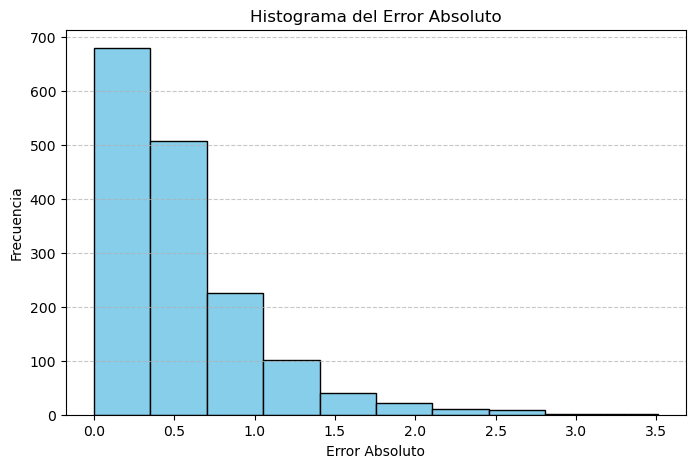

In [13]:
clf = MLPRegressor(hidden_layer_sizes=(250, ), activation='relu', solver='adam', alpha=1.5, batch_size=100,
             learning_rate_init=0.001, max_iter=500, random_state=333)

pred = cross_val_predict(clf, vinos_estandarizados.drop(columns=['quality']), vinos_estandarizados['quality'], cv=10)
reales = vinos_estandarizados['quality']  # Valores reales
error_abs = abs(reales - pred)

vinos_estandarizados['Prediction'] = pred
vinos_estandarizados['Error_Abs'] = error_abs

plt.figure(figsize=(8, 5))
plt.hist(error_abs, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Error Absoluto')
plt.ylabel('Frecuencia')
plt.title('Histograma del Error Absoluto')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#En general, la métrica del Error Absoluto nos indica que la gran mayoría de erres oscilan entre 0 y 1, lo cual indica un rendimiento 
#bueno de la red neuronal, ya que la variable quality varía entre 0 y 10. Eso sí, tenemos unos 100 casos donde el 
#error es más elevado, superior a 1.5, lo cual indica que el modelo falla por cerca de 2 puntos en algunas situaciones.

In [31]:
vinos_mayor_error = vinos_estandarizados.sort_values(by="Error_Abs", ascending=False).head(50)
vinos_mayor_error
#Mostramos los 50 vinos con mayor error absoluto

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality,Prediction,Error_Abs
832,-0.490607,0.765247,0.046593,0.833882,1.191186,-0.490910,3,6.022354,3.022354
1505,1.297065,-1.288771,-1.048130,-0.395750,-0.166115,-0.443976,3,5.487734,2.487734
151,-0.043689,3.743574,0.685181,1.512299,7.918677,-0.960246,4,6.476769,2.476769
652,-0.937525,1.946308,0.745999,0.452272,1.073160,4.202453,5,7.402983,2.402983
7,0.682553,-1.391472,-0.774449,-1.137769,-1.110324,-0.397043,7,4.710924,2.289076
390,1.799848,-1.134720,1.262952,-2.303799,0.955133,2.325108,8,5.739918,2.260082
45,-0.043689,-0.621215,0.563545,-1.773786,-0.579207,2.512842,4,6.230182,2.230182
1276,-0.714066,0.662546,-1.108948,-0.575955,-0.579207,1.480302,4,6.190973,2.190973
440,-1.216849,2.305761,-0.531178,1.035287,0.955133,-0.584777,8,5.820122,2.179878
455,0.514959,2.049009,-0.835267,1.088288,0.187963,2.794444,8,5.841658,2.158342


In [32]:
conteo_notas = vinos_mayor_error["quality"].value_counts()

# Calcular el porcentaje de cada clase dentro de estos vinos
(conteo_notas / conteo_notas.sum()) * 100

#Podemos observar que, de entre los 50 vinos con mayor error absoluto, los que más aparecen son los de nota 4, el 28%, seguidos de 
#cerca por los de nota 7 y 8, con un 22%. Ya con un 18% están los vinos de nota 3, mientras que los vinos de nota 5 aparecen mínimamente,
#son un 10% de los 50, es decir, 5 vinos. Los vinos con nota 6 no se encuentran entre los 50 con más valor absoluto.

quality
4    28.0
7    22.0
8    22.0
3    18.0
5    10.0
Name: count, dtype: float64

In [33]:

vinos_estandarizados.groupby("quality")["Error_Abs"].mean() 
#Agrupamos los vinos en función de su nota y calculamos el error absoluto medio de de cada nota. Observamos que los vinos con un mayor error 
#absoluto medio son los de nota 3, seguidos por los de nota 8 y los de nota 4. Los de notas 5,6 y 7 tienen errores absolutos medios más 
#adecuados, menor de 1. Es llamativo que los valores extremos, 3 y 8, san dos de los valores con mayor error absoluto medio, mientras que los 
#intermedios,como 5 o 6, tienen errores absolutos más bajos. Esto se puede deber a que un error con un valor extremo se acusa más que un
#error con una nota de 5, que "minimiza" el fallo, una teoría que también podemos apreciar en el porcentaje de aparición de cada vino
#en los 50 con mayor valor absoluto, ya que los que menos aparecen son los de nota 5 y 6, mientras que los de nota 7 y 8 aparecen bastante.
#Resulta llamativo que los vinos de nota 7 están entre los vinos que más veces aparecen con un mayor error absoluto medio, pero globalmente
#no tienen un error absoluto medio tan elevado, de lo que se deduce que o bien se predice con mucho error o bien se predice muy 
#precisamente la nota.
#Con estos reusltados, observamos que el perceptrón, según la nota del vino, rinde mejor o peor, con una tendencia a predecir mejor
#las notas intermedias, 5,6 y 7, y a predecir peor las extremas, 3 y 8. Esto no muestra un rendimiento adecuado del perceptrón, ya que
#no es recomendable que tenga rendimientos tan diversos en función del valor numérico a predecir, aunque, de media, como hemos visto antes,
#se equilibran en cierto modo estos fallos y aparenta un rendimiento mejor de lo que realmente estamos observando.


quality
3    2.047991
4    1.349662
5    0.393399
6    0.401138
7    0.812185
8    1.621339
Name: Error_Abs, dtype: float64

In [ ]:
#Finalmente, comparando el MSE del perceptrón con el de KNN, observamos que el MSE medio del percepotrón, 0.42, es mejor que
#el MSE de KNN para cualquier valor de k, ya que en todos los casos supera 0.45, lo cual indica un mejor rendimiento del perceptrón
#frente a KNN, aunque no es excesicvamente superior. Esto era de esperar, ya que KNN es un modelo muy sencillo,
#y basado en instancias, que suele ser utilizado para comparar el rendimiento de otros modelos más sofisticados, 
#como el del perceptrón multicapa. La poca diferencia que hay entre un modelo y otro se puede deber nuevamente a que estamos tratando
#con un problema de "juguete", que no aprecia la diferencia entre usar un modelo más o menos complejo.